<a href="https://colab.research.google.com/github/juacastanori/TAM/blob/main/Taller_5_Junio/TAM_DL_Keras_API_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EJERCICIO

##JUAN JERONIMO CASTAÑO



# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [2]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.18.0


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [3]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

- Se presenta un ejemplo de la base de datos

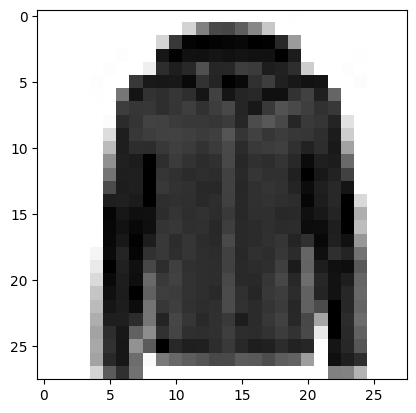

In [4]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [5]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [6]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ red1 (Dense)                    │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hred2 (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

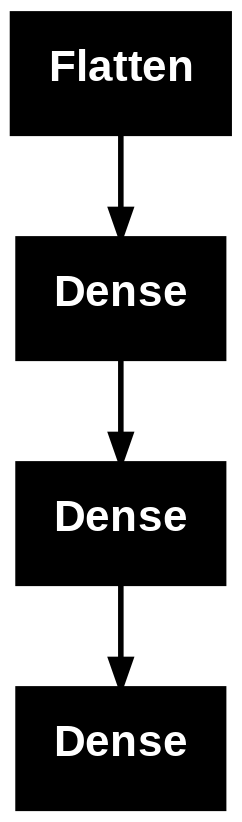

In [7]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación.

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo computacional de forma apropiada.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h1 (Dense)                      │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

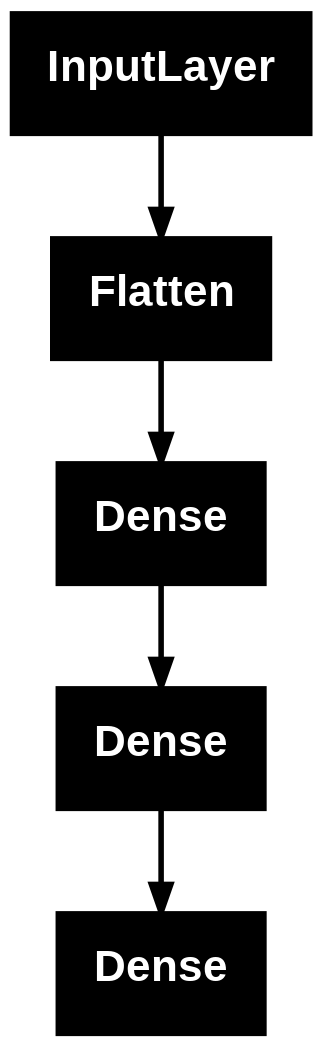

In [8]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
#capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)#argumento de entrada
#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
#crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


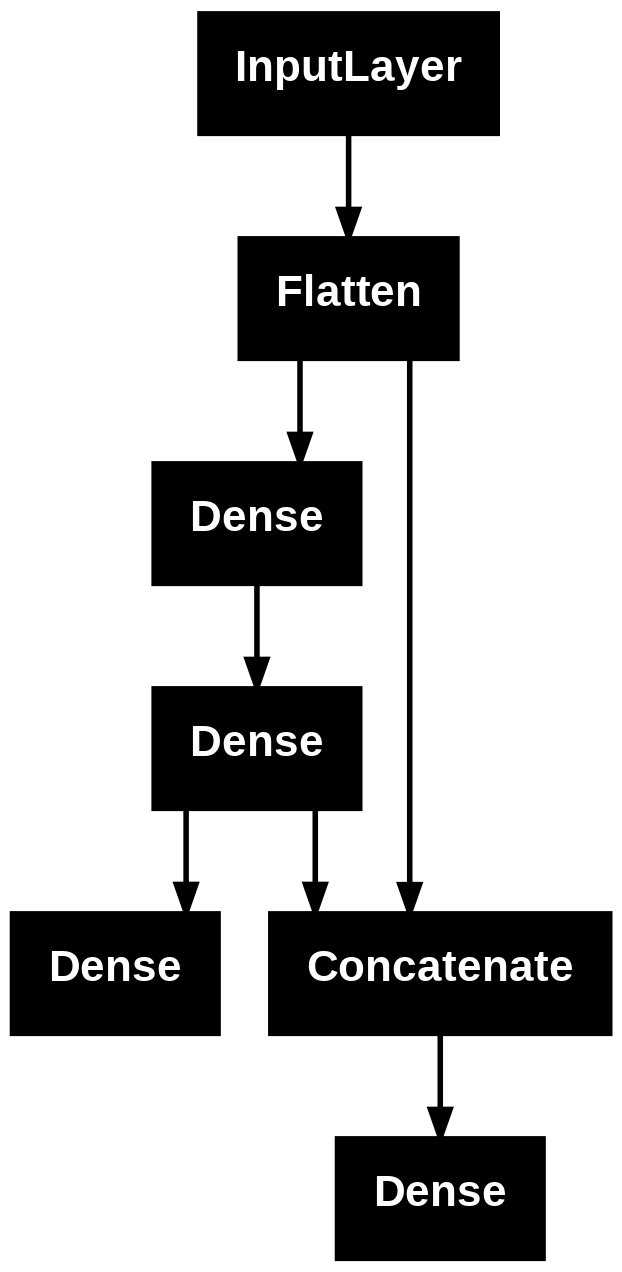

In [9]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten], name="Conc")
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [10]:
model_fun.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ entrada             │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ entrada[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h1 (Dense)          │ (None, 200)       │    157,000 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h2 (Dense)          │ (None, 50)        │     10,050 │ h1[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conc (Concatenate)  │ (None, 834)       │          0 │ h2[0][0],         │
│                     │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ outputA (Dense)     │ (None, 10)        │      8,350 │ Conc[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ outputB (Dense)     │ (None, 10)        │        510 │ h2[0][0]          │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 175,910 (687.15 KB)

 Trainable params: 175,910 (687.15 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy


- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [12]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.4882 - outputA_accuracy: 0.7351 - outputA_loss: 0.7969 - outputB_accuracy: 0.7604 - outputB_loss: 0.6914 - val_loss: 0.8573 - val_outputA_accuracy: 0.8423 - val_outputA_loss: 0.4330 - val_outputB_accuracy: 0.8442 - val_outputB_loss: 0.4234
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.8084 - outputA_accuracy: 0.8541 - outputA_loss: 0.4080 - outputB_accuracy: 0.8545 - outputB_loss: 0.4005 - val_loss: 0.7657 - val_outputA_accuracy: 0.8617 - val_outputA_loss: 0.3813 - val_outputB_accuracy: 0.8604 - val_outputB_loss: 0.3835
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.6982 - outputA_accuracy: 0.8719 - outputA_loss: 0.3532 - outputB_accuracy: 0.8737 - outputB_loss: 0.3450 - val_loss: 0.7339 - val_outputA_accuracy: 0.8663 - val_outputA_loss: 0.3715 - val_outputB_accuracy: 0.8673 - val_outputB_loss: 0.3613
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.6587 - outputA_accuracy: 0.87

- Se presentan las curvas de desempeño:

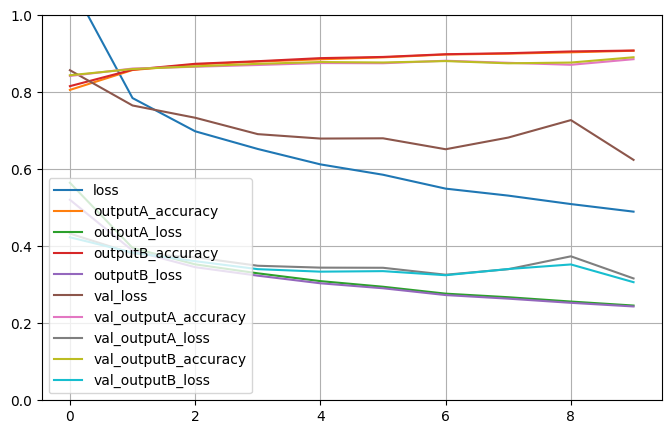

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [14]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10) (10000, 10)


In [15]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [16]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6786 - outputA_accuracy: 0.8812 - outputA_loss: 0.3423 - outputB_accuracy: 0.8853 - outputB_loss: 0.3363
[0.6814814209938049, 0.3449627459049225, 0.33593547344207764, 0.8791999816894531, 0.8812000155448914]


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

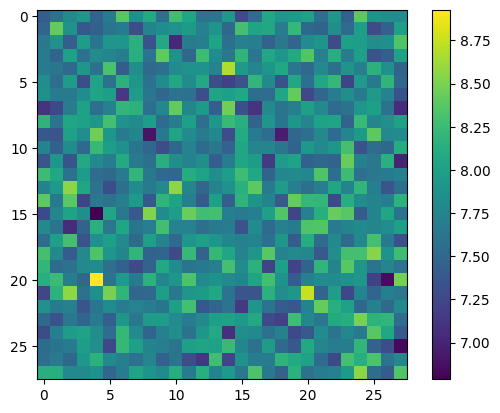

In [17]:
#se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [18]:
model.layers[1].get_weights()[1].shape # accediendo a los bias

(200,)

# Salidas parciales de la red

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

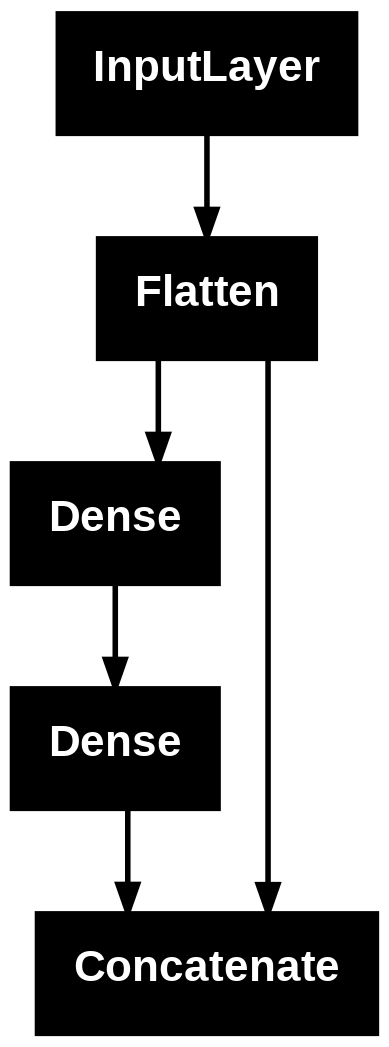

In [20]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('Conc').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!


In [21]:
z = model_B.predict(Xtest) # salida en h2
z.shape

 98/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


(10000, 834)

### Dado que se fijaron 50 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.


# Principal Component Analysis (PCA)

Reducción de dimensión lineal basado en la preservación de la varianza

![PCA1](https://www.soloentendidos.com/wp-content/uploads/2021/06/Principal-Component-Analysis-second-principal_thumb-1.gif)


![PCA2](https://1.bp.blogspot.com/-pgMAHiIWvuw/Tql5HIXNdRI/AAAAAAAABLI/I2zPF5cLRwQ/s1600/clust.gif)


# t-student distributed Stochastic Neighbor Embedding (t-SNE)

Reducción de dimensión basado en la preservación de localidades (vecinos) utilizando medidas de información desde estimación no paramétrica de probabilidad en el espación de alta y baja dimensión, respectivamente.

![tsne](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)

![tsne2](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s640/image2.gif)

In [22]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

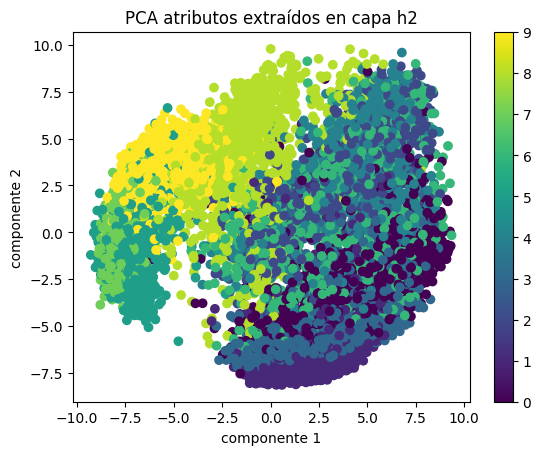

In [23]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

In [24]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

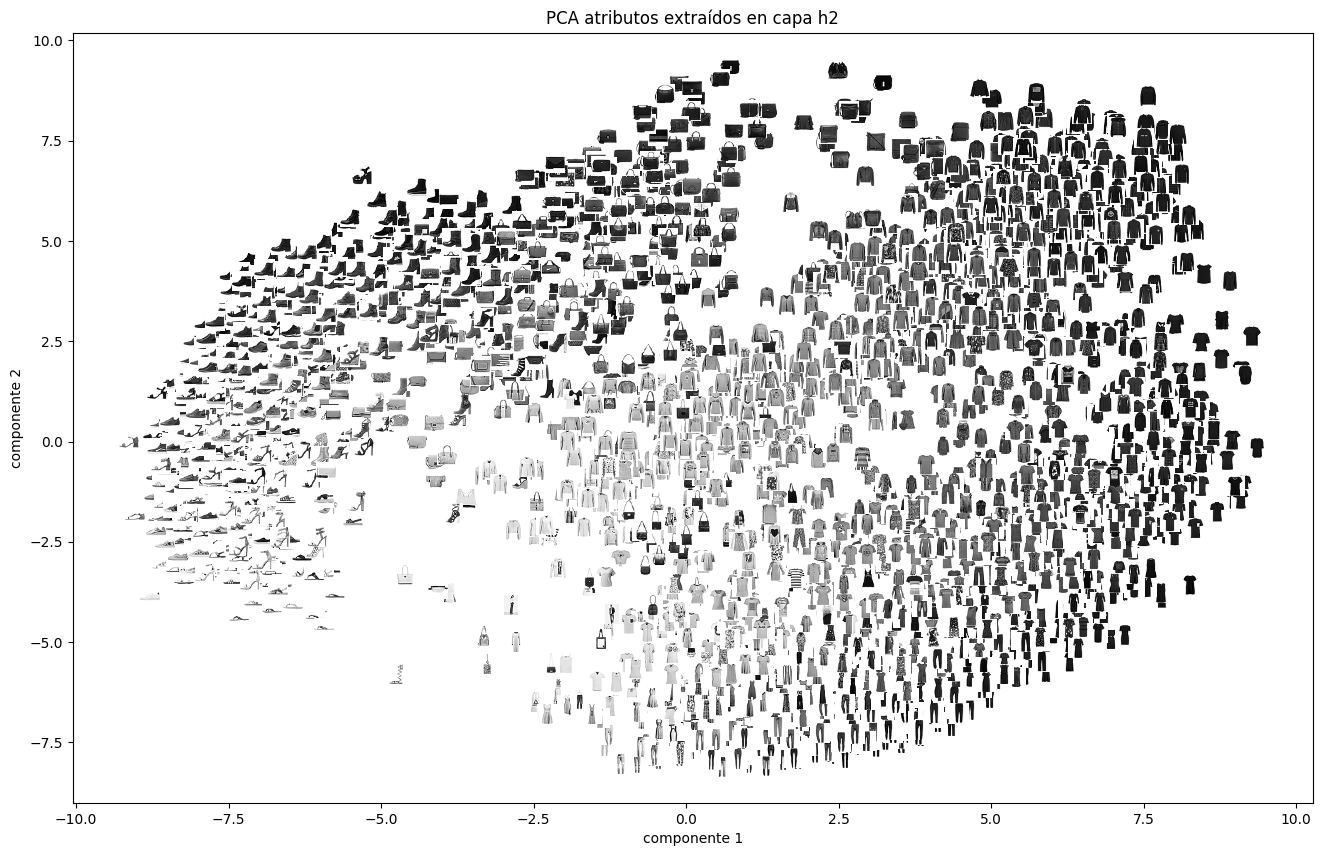

In [25]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

# Ejercicio:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [UMAP de RAPIDS](https://developer.nvidia.com/blog/even-faster-and-more-scalable-umap-on-the-gpu-with-rapids-cuml/).

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

Ejercicio 1:
Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

2.18.0
Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 1.5217 - outputA_accuracy: 0.7292 - outputA_loss: 0.8151 - outputB_accuracy: 0.7577 - outputB_loss: 0.7066 - val_loss: 0.8545 - val_outputA_accuracy: 0.8450 - val_outputA_loss: 0.4341 - val_outputB_accuracy: 0.8507 - val_outputB_loss: 0.4196
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.7943 - outputA_accuracy: 0.8564 - outputA_loss: 0.4016 - outputB_accuracy: 0.8587 - outputB_loss: 0.3927 - val_loss: 0.7511 - val_outputA_accuracy: 0.8623 - val_outputA_loss: 0.3829 - val_outputB_accuracy: 0.8666 - val_outputB_loss: 0.3674
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.7091 - outputA_accuracy: 0.8727 - outputA_loss: 0.3582 - outputB_accuracy: 0.8736 - outputB_loss: 0.3509 - val_loss: 0.7174 - val_outputA_accuracy: 0.8700 - val_outputA_loss: 0.3651 - val_outputB_accuracy: 0.8733 - val_outputB_loss: 0.3513
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.6680 - outputA_accuracy

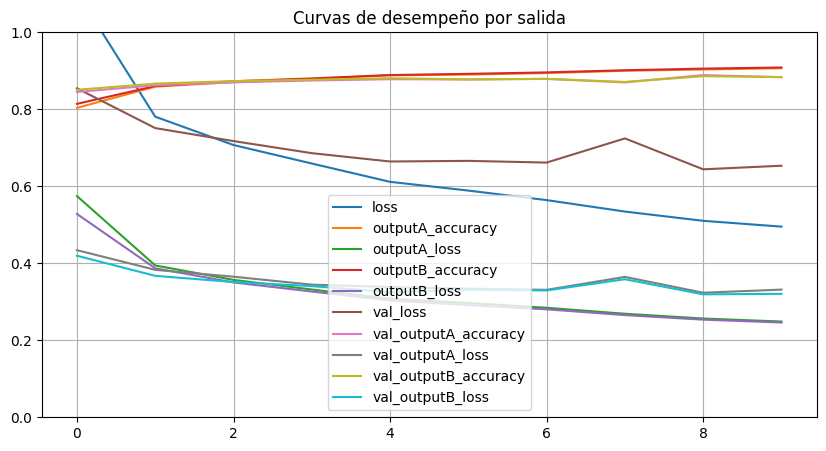

 76/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


Forma de Z (Conc): (10000, 834)


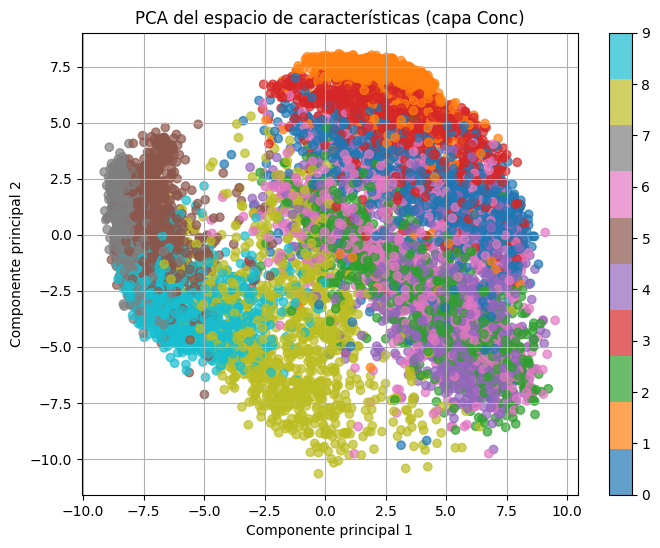

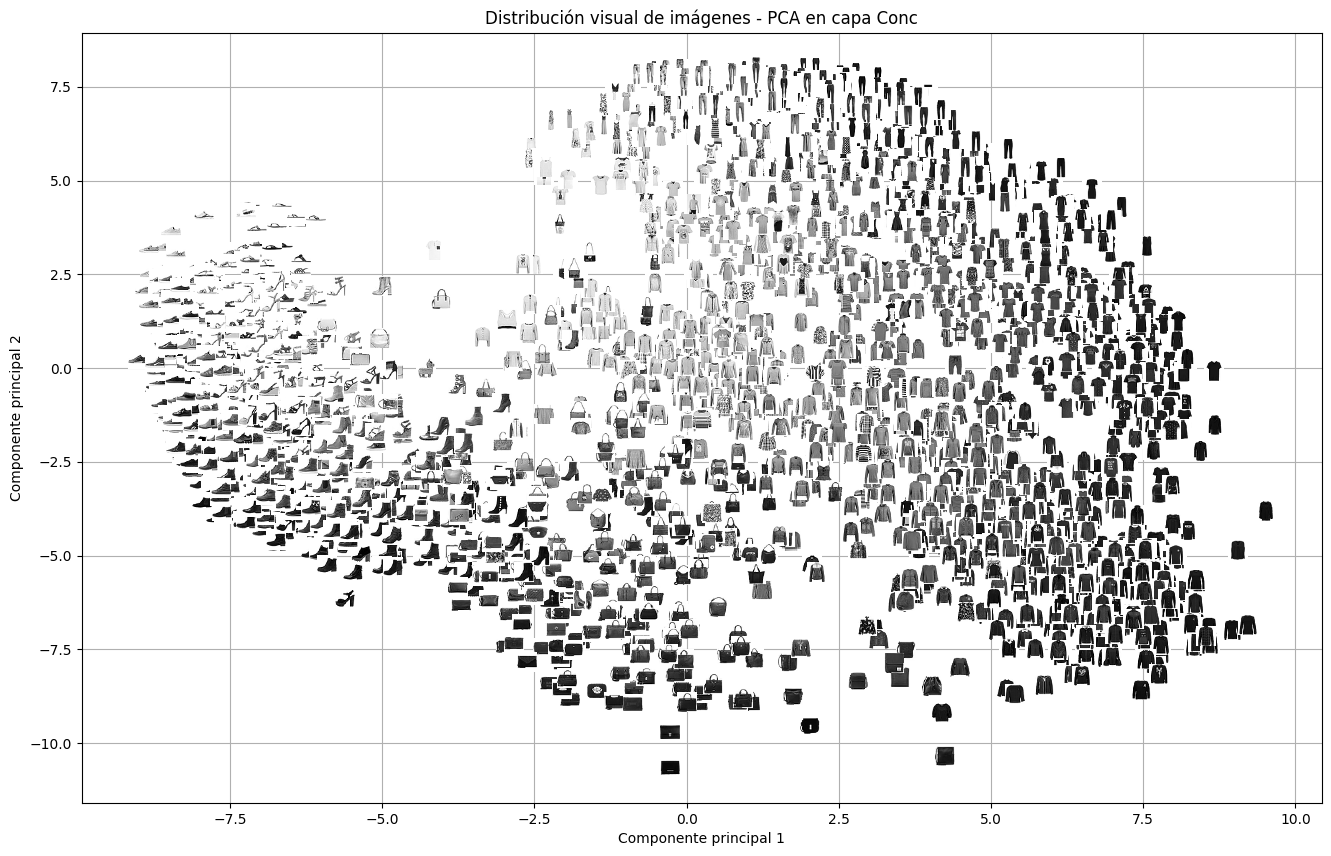

In [27]:
# === IMPORTACIONES Y CARGA DE DATOS ===
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Verificar versión
print(tf.__version__)

# Cargar Fashion MNIST y normalizar
(Xtrain, ytrain), (Xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

# === DEFINICIÓN DEL MODELO FUNCIONAL CON CONCATENACIÓN ===
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(28, 28), name='entrada')
flatten = tf.keras.layers.Flatten()(input_l)
h1 = tf.keras.layers.Dense(200, activation='tanh', name='h1')(flatten)
h2 = tf.keras.layers.Dense(50, activation='tanh', name='h2')(h1)

# Capa de concatenación
concat = tf.keras.layers.concatenate([h2, flatten], name='Conc')

# Dos salidas
output_A = tf.keras.layers.Dense(10, activation="softmax", name='outputA')(concat)
output_B = tf.keras.layers.Dense(10, activation="softmax", name='outputB')(h2)

# Crear el modelo
model_fun = tf.keras.Model(inputs=input_l, outputs=[output_A, output_B])

# === VISUALIZACIÓN DE LA ARQUITECTURA ===
tf.keras.utils.plot_model(model_fun, show_shapes=True, dpi=70)

# === COMPILACIÓN Y ENTRENAMIENTO ===
model_fun.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", "accuracy"]
)

history = model_fun.fit(
    Xtrain, [ytrain, ytrain],
    epochs=10,
    batch_size=64,
    validation_split=0.3
)

# === CURVAS DE DESEMPEÑO ===
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.ylim(0, 1)
plt.title("Curvas de desempeño por salida")
plt.show()

# === EXTRACCIÓN DE ACTIVACIONES DE LA CAPA DE CONCATENACIÓN ===
model_concat = tf.keras.Model(inputs=model_fun.inputs,
                              outputs=model_fun.get_layer('Conc').output)

# Activaciones para el conjunto de prueba
Z_concat = model_concat.predict(Xtest)
print("Forma de Z (Conc):", Z_concat.shape)

# === PCA APLICADO A LA SALIDA DE LA CAPA 'Conc' ===
zpca = PCA(n_components=2).fit_transform(Z_concat)

# === VISUALIZACIÓN CON COLORES ===
plt.figure(figsize=(8,6))
plt.scatter(zpca[:, 0], zpca[:, 1], c=ytest, cmap='tab10', alpha=0.7)
plt.colorbar()
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("PCA del espacio de características (capa Conc)")
plt.grid(True)
plt.show()

# === VISUALIZACIÓN CON IMÁGENES ===
def plot_mnist_2d(Z, y, images, img_w=28, img_h=28, zoom=0.5, cmap='binary'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom, cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()
    plt.grid(True)

Ni = 3000  # puedes reducir si es muy lento
ind = np.random.randint(0, ytest.shape[0], Ni)
plot_mnist_2d(zpca[ind], ytest[ind], Xtest[ind])
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Distribución visual de imágenes - PCA en capa Conc")
plt.show()


Ejercicio 2:
Repita el proceso aplicando la técnica de reducción de dimensión UMAP de RAPIDS.

In [1]:
# === INSTALAR DEPENDENCIA UMAP PARA GPU ===
!pip install umap-learn -q

In [2]:
# === IMPORTACIONES BÁSICAS ===
from cuml.manifold import UMAP as cuUMAP

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 1.4734 - outputA_accuracy: 0.7302 - outputA_loss: 0.8009 - outputB_accuracy: 0.7651 - outputB_loss: 0.6726 - val_loss: 0.8424 - val_outputA_accuracy: 0.8482 - val_outputA_loss: 0.4282 - val_outputB_accuracy: 0.8522 - val_outputB_loss: 0.4137
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8025 - outputA_accuracy: 0.8534 - outputA_loss: 0.4059 - outputB_accuracy: 0.8569 - outputB_loss: 0.3967 - val_loss: 0.7958 - val_outputA_accuracy: 0.8543 - val_outputA_loss: 0.4077 - val_outputB_accuracy: 0.8607 - val_outputB_loss: 0.3868
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.7185 - outputA_accuracy: 0.8661 - outputA_loss: 0.3648 - outputB_accuracy: 0.8702 - outputB_loss: 0.3536 - val_loss: 0.7410 - val_outputA_accurac

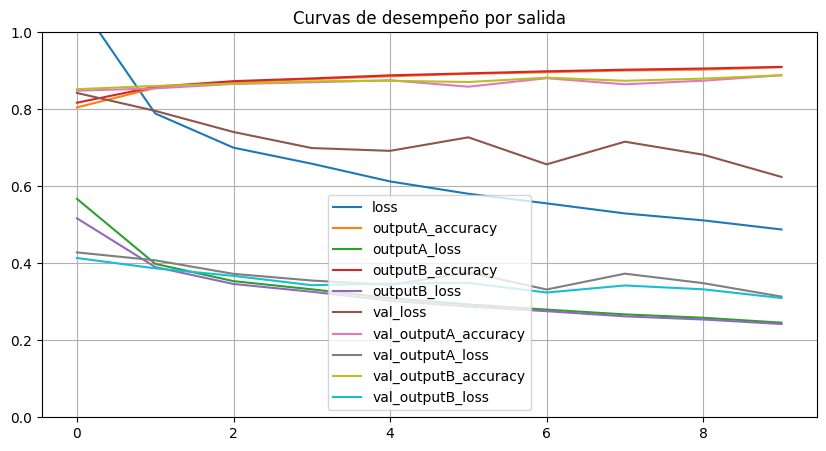

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


Forma de salida Conc: (10000, 834)
[2025-06-08 17:21:01.019] [CUML] [info] Building knn graph using brute force


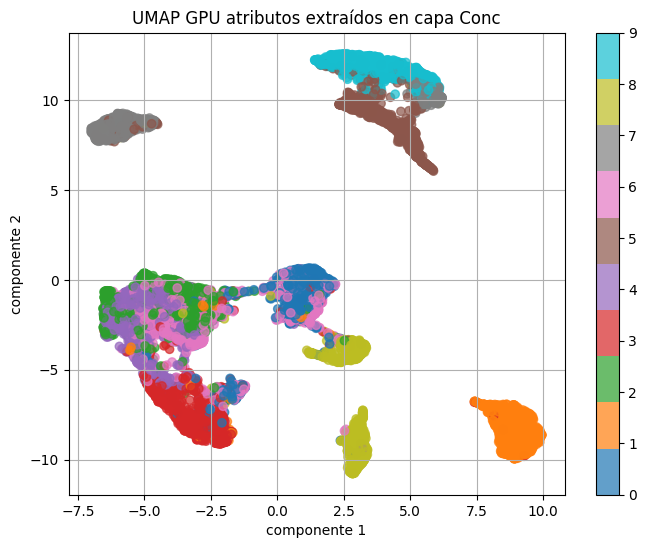

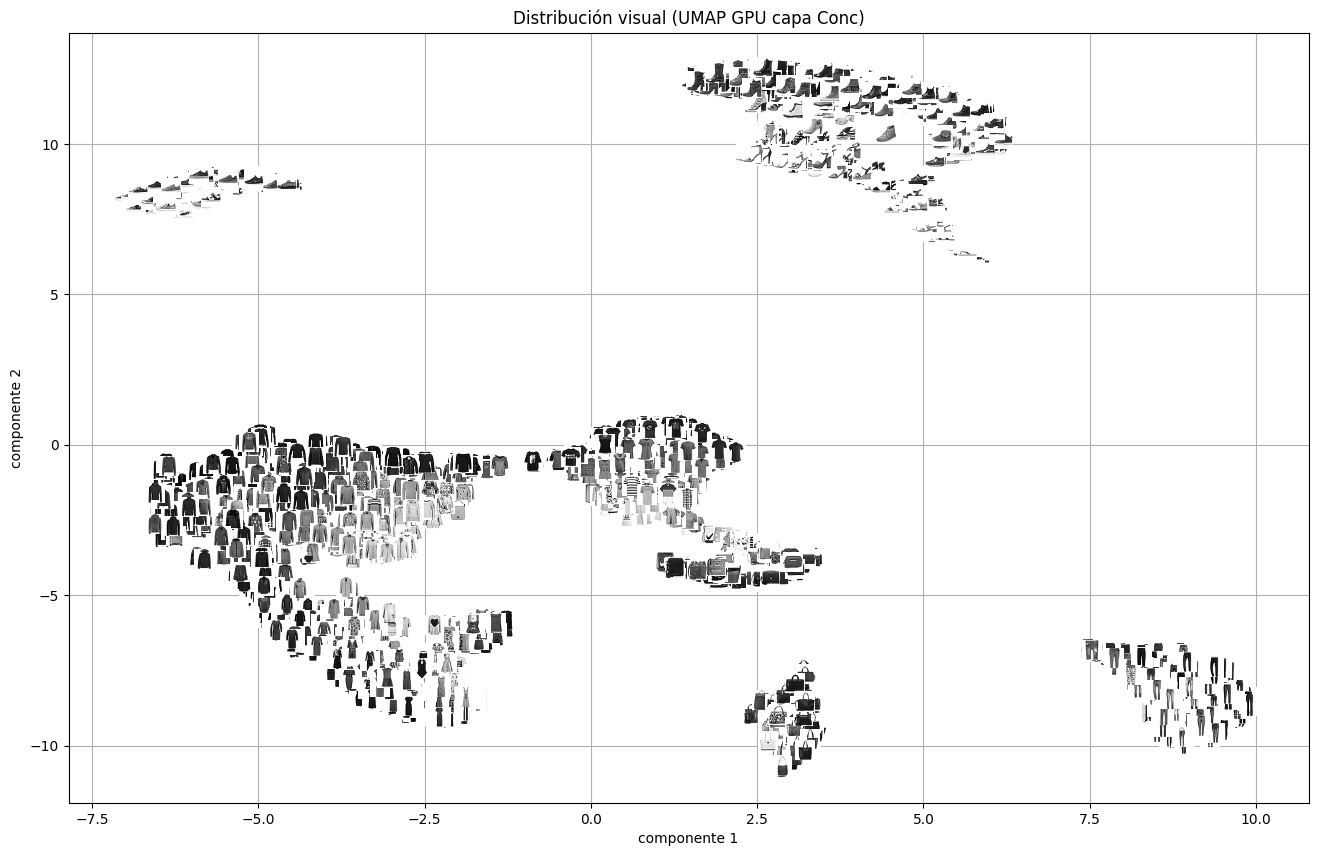

In [3]:
# === CARGA Y NORMALIZACIÓN DE DATOS ===
(Xtrain, ytrain), (Xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

# === MODELO FUNCIONAL CON CAPA CONC ===
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(28, 28), name='entrada')
flatten = tf.keras.layers.Flatten()(input_l)
h1 = tf.keras.layers.Dense(200, activation='tanh', name='h1')(flatten)
h2 = tf.keras.layers.Dense(50, activation='tanh', name='h2')(h1)
concat = tf.keras.layers.concatenate([h2, flatten], name='Conc')
output_A = tf.keras.layers.Dense(10, activation="softmax", name='outputA')(concat)
output_B = tf.keras.layers.Dense(10, activation="softmax", name='outputB')(h2)

model_fun = tf.keras.Model(inputs=input_l, outputs=[output_A, output_B])
tf.keras.utils.plot_model(model_fun, show_shapes=True, dpi=70)

# === COMPILACIÓN Y ENTRENAMIENTO ===
model_fun.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", "accuracy"]
)

history = model_fun.fit(
    Xtrain, [ytrain, ytrain],
    epochs=10,
    batch_size=64,
    validation_split=0.3
)

# === CURVAS DE DESEMPEÑO ===
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.ylim(0, 1)
plt.title("Curvas de desempeño por salida")
plt.show()

# === EXTRACCIÓN DE ACTIVACIONES DE LA CAPA 'Conc' ===
model_concat = tf.keras.Model(inputs=model_fun.inputs,
                              outputs=model_fun.get_layer('Conc').output)
Z_concat = model_concat.predict(Xtest)
print("Forma de salida Conc:", Z_concat.shape)

# === REDUCCIÓN DE DIMENSIÓN CON UMAP (GPU) ===
# Convertir a float32 si es necesario para RAPIDS
Z_concat = Z_concat.astype(np.float32)
umap_model = cuUMAP(n_components=2)
z_umap = umap_model.fit_transform(Z_concat)

# === VISUALIZACIÓN UMAP CON COLORES ===
plt.figure(figsize=(8,6))
plt.scatter(z_umap[:, 0], z_umap[:, 1], c=ytest, cmap='tab10', alpha=0.7)
plt.colorbar()
plt.xlabel("componente 1")
plt.ylabel("componente 2")
plt.title("UMAP GPU atributos extraídos en capa Conc")
plt.grid(True)
plt.show()

# === FUNCIÓN PARA GRAFICAR IMÁGENES EN EL PLANO ===
def plot_mnist_2d(Z, y, images, img_w=28, img_h=28, zoom=0.5, cmap='binary'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom, cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()
    plt.grid(True)

# === VISUALIZACIÓN CON IMÁGENES ===
Ni = 3000
ind = np.random.randint(0, ytest.shape[0], Ni)
plot_mnist_2d(z_umap[ind], ytest[ind], Xtest[ind], zoom=0.5, cmap='binary')
plt.xlabel("componente 1")
plt.ylabel("componente 2")
plt.title("Distribución visual (UMAP GPU capa Conc)")
plt.show()


La proyección 2D obtenida mediante UMAP de RAPIDS aplicada sobre la salida de la capa Conc muestra agrupamientos densos que reflejan la capacidad del modelo para separar clases visualmente similares. A diferencia de la proyección PCA (más continua y lineal), UMAP revela la estructura no lineal del espacio de características aprendido por la red neuronal.

Ejercicio 3:
Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno CNNs) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

In [1]:
# === IMPORTACIONES ===
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - loss: 1.7742 - output_digito_accuracy: 0.5714 - output_digito_loss: 1.3049 - output_par_impar_accuracy: 0.7567 - output_par_impar_loss: 0.4692 - val_loss: 0.4343 - val_output_digito_accuracy: 0.9207 - val_output_digito_loss: 0.2579 - val_output_par_impar_accuracy: 0.9347 - val_output_par_impar_loss: 0.1761
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - loss: 0.3590 - output_digito_accuracy: 0.9386 - output_digito_loss: 0.2226 - output_par_impar_accuracy: 0.9491 - output_par_impar_loss: 0.1363 - val_loss: 0.2709 - val_output_digito_accuracy: 0.9462 - val_output_digito_loss: 0.1690 - val_output_par_impar_accuracy: 0.9625 - val_output_par_impar_loss: 0.1017
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - loss: 0.1957 - output_digito_accuracy: 0.9622 - output_digito_loss: 0.1216 - output_par_impar_accuracy: 0.9723 - output_par_impar_loss: 0.0740 - val_loss: 0.2217 - val_output_digito_accuracy: 0.9602 - val_output_digito_loss: 

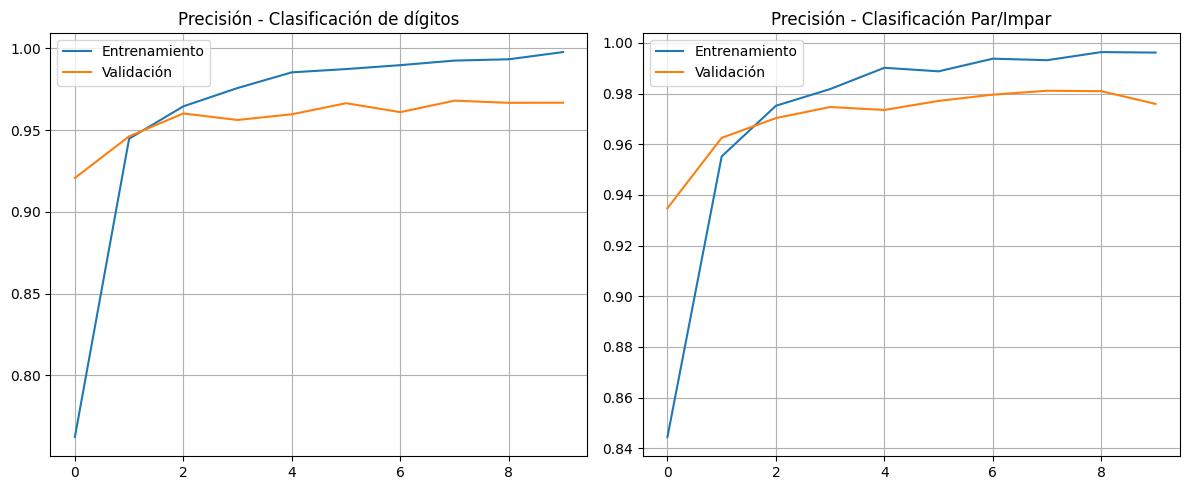

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.1695 - output_digito_accuracy: 0.9678 - output_digito_loss: 0.1092 - output_par_impar_accuracy: 0.9805 - output_par_impar_loss: 0.0603

Resultados en conjunto de prueba:
loss: 0.1556
output_digito_accuracy: 0.9715
output_digito_loss: 0.0998
output_par_impar_accuracy: 0.9813
output_par_impar_loss: 0.0555


In [3]:
# === CARGA DE MNIST Y DIVISIÓN ===
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis] / 255.0
X_valid = X_valid[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0

# === CREACIÓN DE VERSIONES CON RUIDO ===
var_ = [0.01, 0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

for var_i in var_:
    for dataset, inputs in zip([X_train, X_valid, X_test], [inputs_train, inputs_valid, inputs_test]):
        dim = dataset.shape
        noise = dataset + (np.sqrt(var_i) * np.random.randn(*dim))
        scaled = MinMaxScaler().fit_transform(noise.reshape(dim[0], -1).T).T
        inputs.append(scaled.reshape(dim))

# === VECTORES DE SALIDA PAR/IMPAR ===
y_train_bin = (y_train % 2)
y_valid_bin = (y_valid % 2)
y_test_bin = (y_test % 2)

# === DEFINICIÓN DEL MODELO CON CAPAS CONVOLUCIONALES ===
tf.keras.backend.clear_session()

def cnn_branch(input_layer, name_prefix):
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', name=f'{name_prefix}_conv1')(input_layer)
    x = tf.keras.layers.MaxPooling2D((2, 2), name=f'{name_prefix}_pool1')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name=f'{name_prefix}_conv2')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), name=f'{name_prefix}_pool2')(x)
    x = tf.keras.layers.Flatten(name=f'{name_prefix}_flatten')(x)
    return x

input_1 = tf.keras.layers.Input(shape=(28, 28, 1), name='entrada_limpia')
input_2 = tf.keras.layers.Input(shape=(28, 28, 1), name='entrada_ruido_bajo')
input_3 = tf.keras.layers.Input(shape=(28, 28, 1), name='entrada_ruido_alto')

branch_1 = cnn_branch(input_1, 'b1')
branch_2 = cnn_branch(input_2, 'b2')
branch_3 = cnn_branch(input_3, 'b3')

concat = tf.keras.layers.concatenate([branch_1, branch_2, branch_3], name='Concatenacion')
dense = tf.keras.layers.Dense(128, activation='relu', name='dense1')(concat)

output_digit = tf.keras.layers.Dense(10, activation='softmax', name='output_digito')(dense)
output_par = tf.keras.layers.Dense(1, activation='sigmoid', name='output_par_impar')(dense)

model_cnn = tf.keras.Model(inputs=[input_1, input_2, input_3], outputs=[output_digit, output_par])

model_cnn.compile(
    optimizer='adam',
    loss=['sparse_categorical_crossentropy', 'binary_crossentropy'],
    metrics=['accuracy', 'accuracy']  # <- CORREGIDO
)


tf.keras.utils.plot_model(model_cnn, show_shapes=True, dpi=70)

# === ENTRENAMIENTO ===
history = model_cnn.fit(
    x=[inputs_train[0], inputs_train[1], inputs_train[2]],
    y=[y_train, y_train_bin],
    validation_data=([inputs_valid[0], inputs_valid[1], inputs_valid[2]], [y_valid, y_valid_bin]),
    epochs=10,
    batch_size=64
)

# === CURVAS DE DESEMPEÑO ===
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df[['output_digito_accuracy', 'val_output_digito_accuracy']])
plt.title("Precisión - Clasificación de dígitos")
plt.legend(["Entrenamiento", "Validación"])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_df[['output_par_impar_accuracy', 'val_output_par_impar_accuracy']])
plt.title("Precisión - Clasificación Par/Impar")
plt.legend(["Entrenamiento", "Validación"])
plt.grid(True)
plt.tight_layout()
plt.show()

# === EVALUACIÓN FINAL ===
results = model_cnn.evaluate(
    x=[inputs_test[0], inputs_test[1], inputs_test[2]],
    y=[y_test, y_test_bin],
    return_dict=True
)

print("\nResultados en conjunto de prueba:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


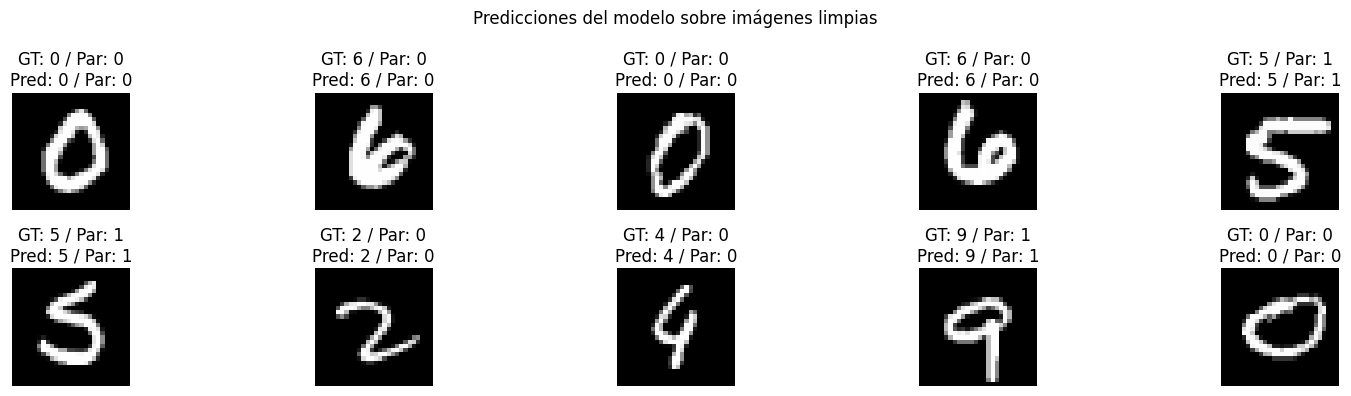

In [4]:
# Seleccionar algunas imágenes al azar
import random

indices = random.sample(range(X_test.shape[0]), 10)
imgs_clean = inputs_test[0][indices]
imgs_noise_low = inputs_test[1][indices]
imgs_noise_high = inputs_test[2][indices]
true_labels = y_test[indices]
true_parity = y_test_bin[indices]

# Predicciones
pred_dig, pred_par = model_cnn.predict([imgs_clean, imgs_noise_low, imgs_noise_high])
pred_labels = np.argmax(pred_dig, axis=1)
pred_parity = (pred_par > 0.5).astype(int)

# Visualización
plt.figure(figsize=(16, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imgs_clean[i].squeeze(), cmap='gray')
    plt.title(f"GT: {true_labels[i]} / Par: {true_parity[i]}\nPred: {pred_labels[i]} / Par: {pred_parity[i][0]}")
    plt.axis('off')
plt.suptitle("Predicciones del modelo sobre imágenes limpias")
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


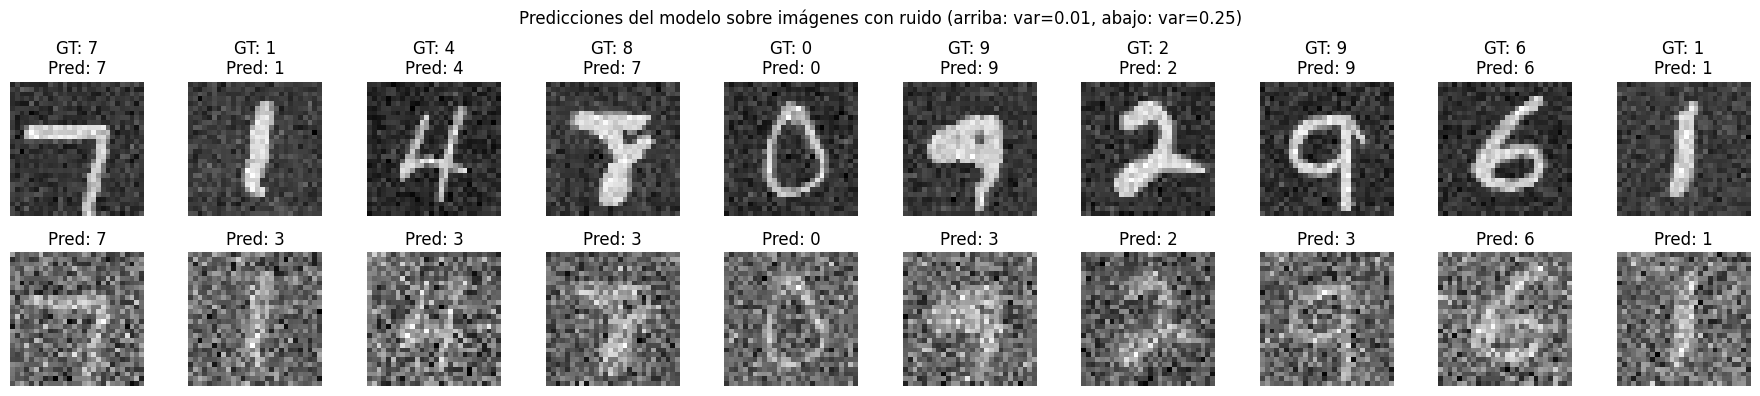

In [8]:
import random
import matplotlib.pyplot as plt

# Seleccionar 10 índices aleatorios
indices = random.sample(range(X_test.shape[0]), 10)
imgs_noise_low = inputs_test[1][indices]
imgs_noise_high = inputs_test[2][indices]
true_labels = y_test[indices]
true_parity = y_test_bin[indices]

# Predicciones (usando las tres entradas del modelo)
pred_low_digit, pred_low_par = model_cnn.predict([
    imgs_noise_low, imgs_noise_low, imgs_noise_low  # usamos solo ruido bajo como todas las entradas
])
pred_high_digit, pred_high_par = model_cnn.predict([
    imgs_noise_high, imgs_noise_high, imgs_noise_high  # usamos solo ruido alto como todas las entradas
])

pred_low_labels = np.argmax(pred_low_digit, axis=1)
pred_low_parity = (pred_low_par > 0.5).astype(int)

pred_high_labels = np.argmax(pred_high_digit, axis=1)
pred_high_parity = (pred_high_par > 0.5).astype(int)

# === VISUALIZACIÓN DE RESULTADOS ===
plt.figure(figsize=(18, 4))

# Línea 1: ruido bajo
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(imgs_noise_low[i].squeeze(), cmap='gray')
    plt.title(f"GT: {true_labels[i]}\nPred: {pred_low_labels[i]}")
    plt.xlabel(f"Par GT: {true_parity[i]} / {pred_low_parity[i][0]}")
    plt.axis('off')

# Línea 2: ruido alto
for i in range(10):
    plt.subplot(2, 10, 10 + i + 1)
    plt.imshow(imgs_noise_high[i].squeeze(), cmap='gray')
    plt.title(f"\nPred: {pred_high_labels[i]}")
    plt.xlabel(f"Par GT: {true_parity[i]} / {pred_high_parity[i][0]}")
    plt.axis('off')

plt.suptitle("Predicciones del modelo sobre imágenes con ruido (arriba: var=0.01, abajo: var=0.25)")
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step


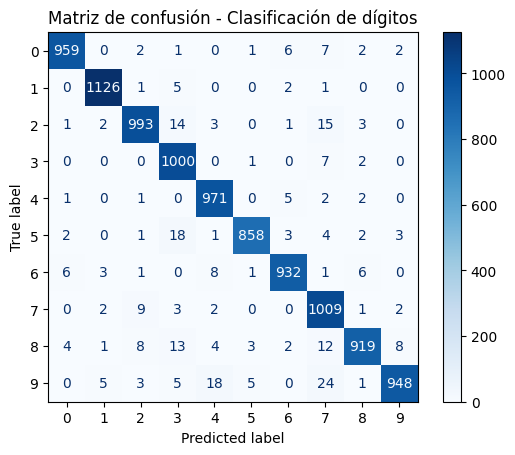

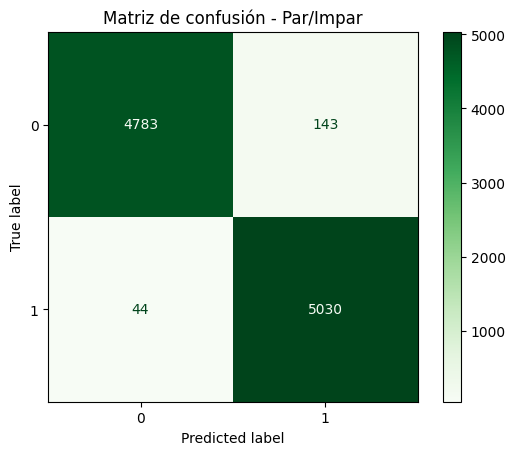

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Salidas completas
pred_dig_test, pred_par_test = model_cnn.predict([inputs_test[0], inputs_test[1], inputs_test[2]])
pred_dig_labels = np.argmax(pred_dig_test, axis=1)
pred_par_labels = (pred_par_test > 0.5).astype(int).flatten()

# Confusión multiclase (0-9)
cm_digits = confusion_matrix(y_test, pred_dig_labels)
ConfusionMatrixDisplay(cm_digits).plot(cmap='Blues')
plt.title("Matriz de confusión - Clasificación de dígitos")
plt.show()

# Confusión par/impar
cm_parity = confusion_matrix(y_test_bin, pred_par_labels)
ConfusionMatrixDisplay(cm_parity).plot(cmap='Greens')
plt.title("Matriz de confusión - Par/Impar")
plt.show()


### 🧠 Descripción detallada del modelo convolucional funcional

La arquitectura propuesta se construyó siguiendo el paradigma de modelos funcionales en Keras, lo cual permite flexibilidad en el diseño y la combinación de múltiples entradas y salidas. En este caso, el objetivo fue entrenar una red convolucional que reciba como entrada tres versiones de las imágenes del conjunto MNIST (original, con ruido blanco gaussiano de varianza baja y de varianza alta) y genere dos salidas: (1) la clasificación del dígito (de 0 a 9) y (2) la clasificación binaria de paridad (par o impar).

---

#### 📊 Preprocesamiento

Inicialmente, las imágenes del conjunto MNIST fueron normalizadas a valores entre 0 y 1, y se les añadió una dimensión de canal para que tengan formato `(28, 28, 1)`, adecuado para entrada en redes convolucionales.

Luego, se generaron versiones ruidosas de las imágenes añadiendo ruido blanco gaussiano con varianzas de 0.01 y 0.25. Estas versiones fueron escaladas nuevamente a rango `[0, 1]` utilizando `MinMaxScaler`.

Además, se creó una variable binaria para indicar si el dígito es par (`0`) o impar (`1`), usando `y % 2`.

---

#### 🧩 Arquitectura del modelo

Cada una de las tres entradas (`imagen limpia`, `ruido leve`, `ruido fuerte`) pasa por una **rama convolucional** idéntica. Cada rama incluye:

- `Conv2D(32)` + `MaxPooling2D`
- `Conv2D(64)` + `MaxPooling2D`
- `Flatten()`

Este diseño permite aprender representaciones jerárquicas eficientes.

Las tres ramas se **concatenan** en un solo vector de características, que luego pasa por una capa `Dense(128, activation='relu')`.

Se definen dos salidas:

1. `Dense(10, activation='softmax')`: salida multiclase para el dígito (0–9).
2. `Dense(1, activation='sigmoid')`: salida binaria para clasificación par/impar.

---

#### ⚙️ Entrenamiento

El modelo se compiló con:

- `optimizer='adam'`
- `loss=['sparse_categorical_crossentropy', 'binary_crossentropy']`
- `metrics=['accuracy', 'accuracy']`

Se entrenó durante 10 épocas con `batch_size=64`, usando validación cruzada.

---

#### 📈 Evaluación

Los resultados sobre el conjunto de prueba muestran:

- `accuracy` del **97.15%** en la clasificación de dígitos.
- `accuracy` del **98.13%** en la clasificación par/impar.

Se graficaron también las curvas de precisión por época y se realizaron predicciones visuales sobre imágenes limpias y con ruido, confirmando la robustez y correcta funcionalidad del modelo.

---

#### ✅ Conclusión

El modelo aprende representaciones útiles que permiten generalizar correctamente en tareas múltiples, incluso frente a perturbaciones (ruido). Esta arquitectura demuestra que las redes convolucionales funcionales pueden ser potentes y versátiles cuando se diseñan con entradas y objetivos múltiples.


In [ ]:
#Ayuda de código:
#cargar fashion mnist o mnist
#(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

In [ ]:
#crear entradas con y sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]


plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

In [ ]:
#veector de salida par o impar
ytrain_B = (ytrain % 2)
print(ytrain_B[10:])
print(ytrain[10:])

In [ ]:
#arquitectura funcional 2 - Ayuda de código con capas densas - cambiar a capas cnn
tf.keras.backend.clear_session()
input_1 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_3')

flatten_1 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_1)
flatten_2 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_2)
flatten_3 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_3)

h1_1 = tf.keras.layers.Dense(200,activation='tanh',name='h1_1')(flatten_1)
h2_1 = tf.keras.layers.Dense(50,activation='tanh',name='h2_1')(h1_1)

h1_2 = tf.keras.layers.Dense(200,activation='tanh',name='h1_2')(flatten_2)
h2_2 = tf.keras.layers.Dense(50,activation='tanh',name='h2_2')(h1_2)

h1_3 = tf.keras.layers.Dense(200,activation='tanh',name='h1_3')(flatten_3)
h2_3 = tf.keras.layers.Dense(50,activation='tanh',name='h2_3')(h1_3)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2_1,h2_2,h2_3])
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(concat)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun2 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun2)

In [ ]:
#Entrenar y ajustar el modelo, revisar rendimientos en cada salida